# Interactive White Matter Segmentation

In this notebook you'll have the opportunity to perform an interactive, anatomically based white matter segmentation right here in the browser, using your own data.  This will allow you to explore the anatomical connectivity instantiated in your tractogram to get a sense of the quality of your tractography data, what parts of the brain are connected to what (according to your tracrogram), and how well your volumetric atlas serves your needs.  

## Initial setup
Before we can do any of this though, we have to make sure this notebook is setup correctly and can access your data.

### Using this notebook locally

If you're using this notebook locally, one of the foremost things you should ensure is that your local python environment has the necessary packages installed.  Check the **requirements.txt** file in this repository to determine which packages are necessary.

When running this notebook locally, you should be able to navigate to the appropriate folder(s) containing your data using the file chooser provided by the subsequent cells.

### Jupyterlab / binder

If you're using a [jupyterlab](https://jupyter.org/) [binder](https://mybinder.org/), there's an extra step to making your data avaialble to this interface.  In order to do this, you'll need to upload your data to this virtual environment.  NOTE: because this is a temporary virtual environment, any data that you upload here will not be preserved.  All the same, it is best to be careful about what data is uploaded.  To upload data to this [jupyterlab](https://jupyter.org/) environment Click the **file icon** in the **left hand menu**, then click the **underlined up arrow** to begin the upload selection.  This should be sufficient setup, as package managment is taken care of by these platforms.

### Jupyter Notebook Classic / binder

Alternatively, if you're using a classic jupyter-notebook [binder](https://mybinder.org/) (acheived by clicking **Launch Classic Notebook** under the **help menu**, and temporarily _reccomended_ until widget interfacing has been fixed in jupyterlab) click the **upload** button towards the upper right hand side of the interface and upload the files below, and then select this notebook (InteractiveWhiteMatterSegmentation.ipynb) and proceed normally.

## Target data

For this particular notebook to operate successfully you'll need to upload the following:

- The desired volumetric brain segmentation that will be used to specify brain areas that you wish to view connectivity between (the atlas and the tractrogram should be aligned to one another / in the same space).
- A whole-brain tractogram containing the candidate streamlines you wish to inspect/segment (the atlas and the tractrogram should be aligned to one another / in the same space).
- A lookup table (csv or xls) indicating the human-interpretable identities of the labels in the volumetric brain atlas file.

In the several of the following cells, you will be asked to select/specify your data targets.  Their location will depend on the method by which you are interfacing with this notebook (as described in the [Initial setup](#Initial setup) section.  As with any jupyter notebook, you will need to hit **run** for each cell in order to proceed.  For data upload blocks this will trigger the provision of a file-chooser interface.  For other code blocks, running the cell will result in the production of a visualization, table, or other graphical/interactive feature.

## The Atlas

### Selecting the atlas
We'll begin by selecting the volumetric brain atlas that you would like to use to select your streamlines of interest.  Later on, you'll be selecting labels/regions from this atlas as a means of indicating that you would like to visualize streamlines that begin or end (tractography is agnostic with respect to directionality) in these areas.

In [5]:
#upload widget not working right now, just use path specification for current purposes
#import ipywidgets as widgets
#uploader = widgets.FileUpload()
#uploader

#set path to atlas
from ipyfilechooser import FileChooser
import os

# Create and display a FileChooser widget
# if a file has already been selected, do not revert to no file selected
if 'fcAtlas' in locals():
    #however, if the selected file path is None, do rectify that
    if fcAtlas.selected_path==None:
        print('Please select your input atlas file')
        fcAtlas = FileChooser(os.getcwd())
        display(fcAtlas)
    else:
        # just redisplay what you already have
        fcAtlas.default_path = fcAtlas.selected_path
        fcAtlas.default_filename=fcAtlas.selected_filename
    
#if it doesn't exist at all (not sure how that would happen) also be sure to rectify that
elif not('fcAtlas' in locals()):
    fcAtlas = FileChooser(os.getcwd())
    print('Please select your input atlas file')
    display(fcAtlas)

Please select your input atlas file


FileChooser(path='/media/dan/storage/gitDir/interactiveWMSegmentation', filename='', title='', show_hidden=Fal…

## The reference anatomy

In order to get a better look at what has been segmented (and because there is no reference anatomy in the above visualization) we can also convert these selected streamlines to a density map and plot them on a reference T1.  To do this we'll need to upload a reference T1 in the same fashion as our other data objects.

**Note** this will only be useful **if** the T1 image is aligned to / in the same space as the tractography.

(after selecting the file to upload, run the subsequent cell as well in order to create an interactive visualizer)

In [3]:
# Create and display a FileChooser widget
# if a file has already been selected, do not revert to no file selected
from ipyfilechooser import FileChooser
import os

if 'T1path' in locals():
    #however, if the selected file path is None, do rectify that
    if T1path.selected_path==None:
        print('Please select your T1 file')
        T1path = FileChooser(os.getcwd())
        display(T1path)
    else:
        # just redisplay what you already have
        T1path.default_path = T1path.selected_path
        T1path.default_filename=T1path.selected_filename
        display(T1path)
#if it doesn't exist at all (not sure how that would happen) also be sure to rectify that
elif not('T1path' in locals()):
    T1path = FileChooser(os.getcwd())
    print('Please select your input T1 file')
    display(T1path)

Please select your input T1 file


FileChooser(path='/media/dan/storage/gitDir/interactiveWMSegmentation', filename='', title='', show_hidden=Fal…

### Loading and inspecting the atlas

Now that we have selected the atlas file, let's take a moment to inspect it.  Run both of the next **two** cells, and then feel free to use the X, Y, and Z sliders to move about the atlas volume.

In [9]:
#conditionally plot the atlas if a file has been chosen.  If not, print warning.
#this might be avoidable with a clever use of observe

import copy
import numpy as np
if not(fcAtlas.selected_path==None):
    pathToAtlas=os.path.join(fcAtlas.selected_path,fcAtlas.selected_filename)
    #load the nifti
    import nibabel as nib
    atlasImg = nib.load(pathToAtlas)
    T1ToLoad=(os.path.join(T1path.selected_path,T1path.selected_filename))
    t1img = nib.load(T1ToLoad)
    from nilearn import plotting
    #doesn't seem to work here, or anywhere that's in a loop/statement of some sort
    plotting.view_img(stat_map_img=renumberedAtlasNifti, bg_img=t1img,dim=2 ,opacity=.5, cut_coords=None,colorbar=True,cmap='prism', symmetric_cmap=False).resize(900,400)

    
    #now relabel it; maybe not necessary with monkey atlases, we'll see

    #in order to have visually distinguishable areas we have to renumber the labels in the data object
    #this is because niwidgets scales the color map via the min and max values of the labeling scheme,
    #rather than by unique values
    #this takes a while to perform, so if it already exists, check, load it, and don't do it again.
    if os.path.isfile('relabeledAtlas.nii.gz'):
        renumberedAtlasNifti = nib.load('relabeledAtlas.nii.gz')
        relabeledAtlasData=copy.deepcopy(renumberedAtlasNifti)
    else:
        #need to make a deep copy, otherwise the relabeling process relabels the origional
        relabeledAtlasData=copy.deepcopy(atlasImg.get_fdata())

        #get the unique entries
        
        uniqueAtlasEntries=np.unique(relabeledAtlasData).astype(int)

        #iterate across unique label entries
        for iLabels in range(len(uniqueAtlasEntries)):
            #replace the current uniqueAtlasEntries value with the iLabels value
            #constitutes a simple renumbering schema
            relabeledAtlasData[relabeledAtlasData==uniqueAtlasEntries[iLabels]]=iLabels

        #save to working directory; required as nifitWidget doesn't load from object apparently
        renumberedAtlasNifti=nib.Nifti1Image(relabeledAtlasData, atlasImg.affine, atlasImg.header)  
        #save the object down
        nib.save(renumberedAtlasNifti, 'relabeledAtlas.nii.gz')


    #plotting.view_img(t1img,cut_coords=None,colorbar=True,cmap='prism', symmetric_cmap=False).resize(900,400)
    #from niwidgets import NiftiWidget
    #atlas_widget = NiftiWidget('relabeledAtlas.nii.gz')
    #atlas_widget.nifti_plotter(colormap='nipy_spectral')
else:
    print('No input atlas file selected.  Please return to previous cell, select an atlas file, and rerun this cell.')

test



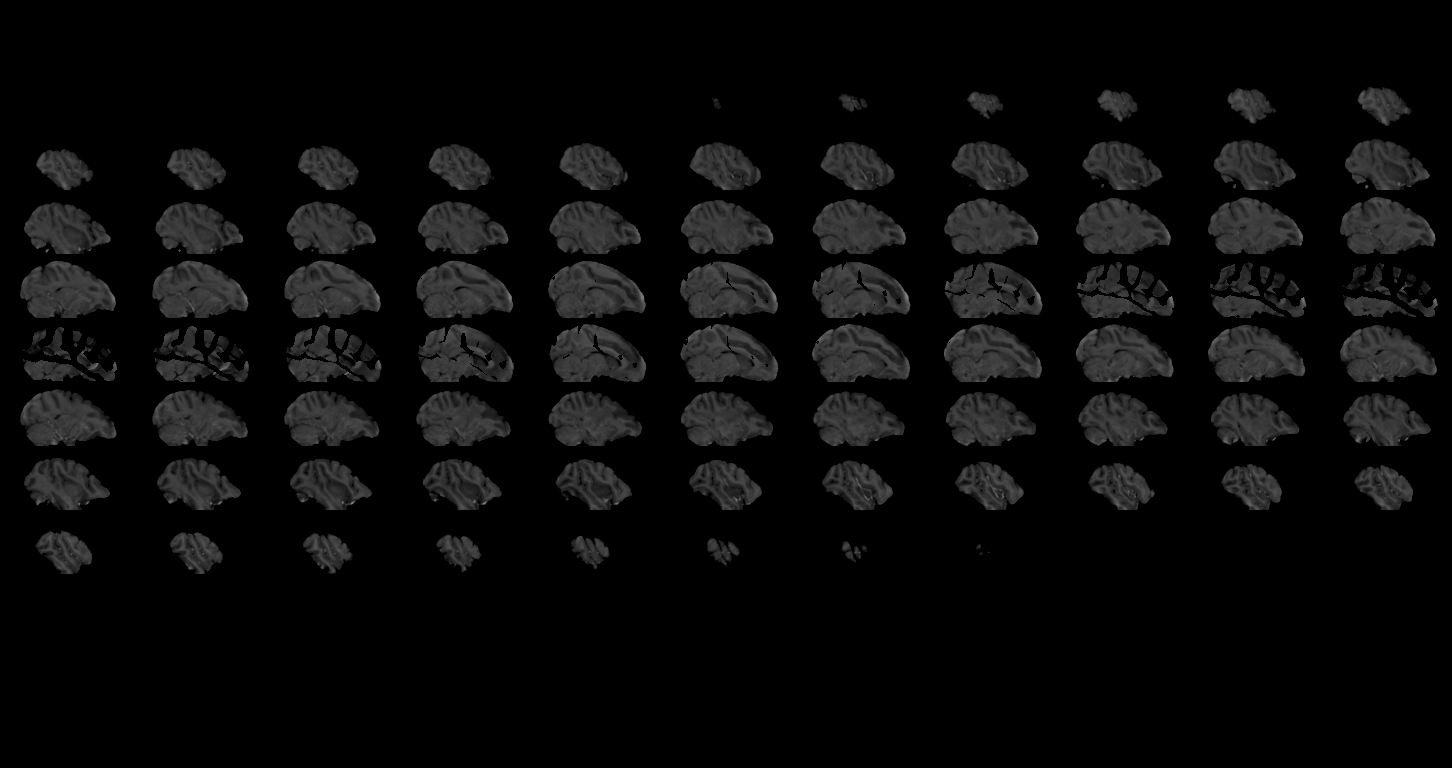
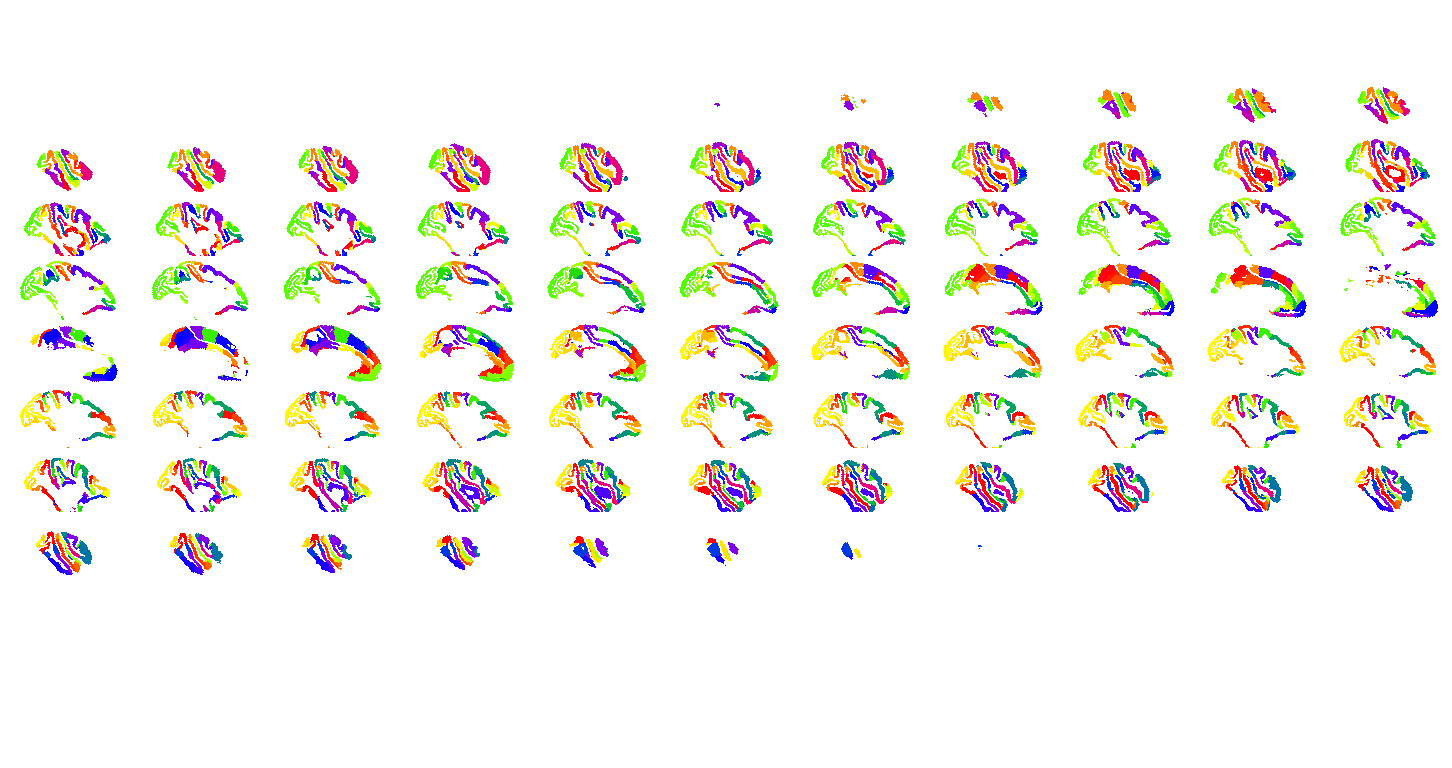

In [10]:
#because nilearn.plotting.view_image is cantankerous
plotting.view_img(stat_map_img=renumberedAtlasNifti, bg_img=t1img,dim=2 ,opacity=.5, cut_coords=None,colorbar=True,cmap='prism', symmetric_cmap=False).resize(900,400)

## The lookup table

### Selecting the lookup table

Next we'll select the Lookup table for the atlas you have provided.  The Lookup table provides information about the correspondances of the numerical labels in the atlas file you just provided with the anatomical/conceptual entities they are supposed to designate (as described [here, in a broad manner](https://dannbullock.github.io/WiMSE/notebooks/How_to_interpret_a_volumetric_brain_segmentation.html) and [here, in the context of color lookup tables](https://www.slicer.org/wiki/Documentation/4.1/SlicerApplication/LookupTables).

We will be using an interactive interface with a spreadsheet version of the lookup table in order to select which labels will be required endpoints for our streamlines of interest.  Technically you do not need to provide an Lookup table, as this notebook will peice together a spreadsheet label-selection interface in one is not found, however such an interface will have no terminology-based labeling information and will thus be fairly difficult to interpret or work with. 

In [1]:
#set path to atlas
from ipyfilechooser import FileChooser
import os

if 'fcLUT' in locals():
    #however, if the selected file path is None, do rectify that
    if fcLUT.selected_path==None:
        print('Please select your input Lookup table file')
        fcLUT = FileChooser(os.getcwd())
        display(fcLUT)
    else:
        # just redisplay what you already have
        fcLUT.default_path = fcLUT.selected_path
        fcLUT.default_filename=fcLUT.selected_filename
#if it doesn't exist at all (not sure how that would happen) also be sure to rectify that
elif not('fcLUT' in locals()):
    fcLUT = FileChooser(os.getcwd())
    print('Please select your input Lookup table file')
    display(fcLUT)

Please select your input Lookup table file


FileChooser(path='/media/dan/storage/gitDir/interactiveWMSegmentation', filename='', title='', show_hidden=Fal…

### Inspecting and interacting with the lookup table

Lets take a quick look at the LUT that has been provided (or that will be built) using [qgrid](https://github.com/quantopian/qgrid).

In [2]:
#conditionally plot the atlas if a file has been chosen.  If not, build a table from the information in the passed atlas.
#this might be avoidable with a clever use of observe
import pandas as pd
if not(fcLUT.selected_path==None):
    LUTpath=os.path.join(fcLUT.selected_path,fcLUT.selected_filename)
    if fcLUT.selected_filename[-4:]=='.csv':
        LUT=pd.read_csv(LUTpath)
    elif (fcLUT.selected_filename[-4:]=='.xls',fcLUT.selected_filename[-5:]=='.xlsx'):
        LUT=pd.read_excel(LUTpath)
else:
    #build it from the input data
    import numpy as np
    inferredLUTIdentities={'origLabels': np.unique(atlasImg.get_fdata()).astype(int),'newLabels':np.unique(renumberedAtlasNifti.get_fdata()).astype(int)}
    LUT=pd.DataFrame(data=inferredLUTIdentities)  

#one way or the other the LUT should now be available
import qgrid
qgrid_firstLUT_widget= qgrid.show_grid(LUT,show_toolbar=True)
qgrid_firstLUT_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## The tractogram

### Selecting the tractogram 

Next, let's select the tractogram file.  Due to the [RAM limitations of binder](https://mybinder.readthedocs.io/en/latest/about/about.html#how-much-memory-am-i-given-when-using-binder), if you are using binder or a similar service, it is **strongly** recomend that you limit the size of the uploaded tractogram to less than 1.25 GB.  Otherwise, tractogram limitations are associated with your local hardware (in particular RAM).

In [ ]:
# Create and display a FileChooser widget
# if a file has already been selected, do not revert to no file selected
if 'fcTractogram' in locals():
    #however, if the selected file path is None, do rectify that
    if fcTractogram.selected_path==None:
        print('Please select your input tractogram file')
        fcTractogram = FileChooser(os.getcwd())
        display(fcTractogram)
    else:
        # just redisplay what you already have
        fcTractogram.default_path = fcTractogram.selected_path
        fcTractogram.default_filename=fcTractogram.selected_filename
#if it doesn't exist at all (not sure how that would happen) also be sure to rectify that
elif not('fcTractogram' in locals()):
    fcTractogram = FileChooser(os.getcwd())
    print('Please select your input tractogram file')
    display(fcTractogram)

## Visualizing and interacting with the tractogram

Now that you have selected your tractogram, lets interactively view it.

**NOTE**: due to [an ipyvolume idiosyncracy](https://github.com/maartenbreddels/ipyvolume/issues/206) the following visualization widget will begin in an extremely zoomed out state.  Use your middle mouse button (or mouse scroll inteface) to zoom in on the tracrogram visualization)

**Warning**:  If you have more than 100,000 streamlines in your input tractogram, it is _highly_ recommended that you skip the next cell and move on to the dipy-based segmentation as this next visualization would be incredibly demanding of available hardware.

In [ ]:
import nibabel as nib
#conditionally plot the tractogram if a file has been chosen.  If not, print warning.
#this might be avoidable with a clever use of observe
def plotParcellationConnectionWidget(tractogramToPlot):
    #import widget
    from niwidgets import StreamlineWidget
    #set widget object
    tractogramToPlot
    sw = StreamlineWidget(streamlines=tractogramToPlot.streamlines)
    #set plotting characteristics
    style = {'axes': {'color': 'red',
                'label': {'color': 'white'},
                'ticklabel': {'color': 'white'},
                'visible': False},
                'background-color': 'black',
                'box': {'visible': False}}
        
    #plot it
    #set a viable threshold for how many streamlines to default to plotting
    #likely dependant on available resources and such
    streamThresh=25000
    if len(tractogramToPlot.streamlines)<=streamThresh:
        defaultPercentile=0
        print('Plotting tractogram for all ' + str(len(tractogramToPlot.streamlines)) + ' streamlines.') 
    else:
        defaultPercentile=1-(len(tractogramToPlot.streamlines)/streamThresh)
        print('Plotting tractogram for ' + str(((1-defaultPercentile)*streamThresh)) +' of ' + str(len(streamsObjIN.streamlines)) + ' streamlines.')
      
    sw.plot(display_fraction=1, width=1000, height=1000, style=style, percentile=defaultPercentile)

if not(fcTractogram.selected_path==None):   
    tractogramPath=(os.path.join(fcTractogram.selected_path,fcTractogram.selected_filename))
    #compute size and throw warning or error if file size too 
    tractogramGBSize=os.path.getsize(tractogramPath)/(1024*1024*1024)
    if 2>tractogramGBSize>1.25:
        import warnings
        warnings.warn("Input size of tractogram ("+str(tractogramGBSize)+"GB) exceeds recomended value")
    elif tractogramGBSize>2: 
        raise ValueError("Input size of tractogram ("+str(tractogramGBSize)+"GB) exceeds maximum RAM allocation")

    #do a check to see if the selected input file type is supported
    if not(nib.streamlines.is_supported(tractogramPath)):
        raise ValueError("Input tractogram file type not supported")
    else:
        streamsObjIN=nib.streamlines.load(tractogramPath)

    
    display(plotParcellationConnectionWidget(streamsObjIN))
else:
    print('No input tractogram file selected.  Please return to previous cell, select a tractogram file, and rerun this cell.')

## The segmentation

### An initial segmentation of the tractogram

Now we'll use [dipy](https://dipy.org/) to perform a _full segmentation_ (as demonstrated and described [here](https://dannbullock.github.io/WiMSE/notebooks/A_first_segmentation.html)) and then, using the aforementioned looktable interface, select those labels that we wish to require our streamlines of interest to have endpoints in.  The goal of this is two-fold.  First, the resultant heatmap plot gives us an impression (however abstract) of the overall pattern of connectivity instantiated in our input tractome.  Second, the pre-application of this segmentation makes the later selection of streamlines _much_ simpler.

**NOTE**: This process may take a non-trivial amount of time to complete.

In [ ]:
import nibabel as nib
if not(fcTractogram.selected_path==None):   
    tractogramPath=(os.path.join(fcTractogram.selected_path,fcTractogram.selected_filename))

    #do a check to see if the selected input file type is supported
    if not(nib.streamlines.is_supported(tractogramPath)):
        raise ValueError("Input tractogram file type not supported")
    else:
        streamsObjIN=nib.streamlines.load(tractogramPath)
else:
    print('No input tractogram file selected.  Please return to tractogram input cell, select an tractogram file, and rerun this cell.')

from dipy.tracking import utils
#segment tractome into connectivity matrix from parcellation
M, grouping=utils.connectivity_matrix(streamsObjIN.tractogram.streamlines, atlasImg.affine, label_volume=renumberedAtlasNifti.get_fdata().astype(int),
                            return_mapping=True,
                            mapping_as_streamlines=False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Connectivity profile for ' + str(len(streamsObjIN.tractogram.streamlines)) + ' streamlines.')
sns.heatmap(np.log1p(M))
plt.show()

### Selecting anatomical regions of interest

Now, lets use qgrid once more, but this time, you (the user) will be tasked with modifying the table in accordance with your segmentation goals.  In the table below, use the information in the column associated with anatomical terminology (if available) to select the labels that you wish to use as endpoint criteria for selecting streamlines.  Feel free to use the search functionality of the table by clicking the symbol beside a column's name.

To add a label to a either criteria "region1" or criteria "region2" place a value of **1** (as in the form of a **boolean vector** in the corresponding column.  The labels will be combined into "region1" and "region2" in accordance with this input, and (in the next cell) the ccoresponding streamlines will be displayed.

**Because it can be easy to reset the jupyter cell type to "Markdown" when making this selection, the next code cell's metadata has been set to prevent modifying the code, you may change this metadata setting if you wish.**

In [ ]:
# import numpy as np
# if the length of the provided LUT exceeds the number of unique entries, then the indexes of the table cannot be relied
#upon to provide us with the correspondance to the relabeled atlas.  If this is the case, try and implement a workaround.
if len(LUT)>len(np.unique(relabeledAtlasData)):
    #infer which column contains the original identities
    #presumably, this would be the LUT column with the largest number of matching labels with the original atlas.
    matchingLabelsCount=[len(list(set(LUT[iColumns]).intersection(set(np.unique(atlasImg.get_fdata()).astype(int))))) for iColumns in LUT.columns.to_list()]
    #there's an edge case here relabeled atlas == the original atlas AND the provided LUT was larger (what would the extra entries be?)
    #worry about that later
    columnBestGuess=LUT.columns.to_list()[matchingLabelsCount.index(np.max(matchingLabelsCount))]
    #now that we have the guess, get the corresponding row entries, and reset the index.
    #This should make the index match the renumbered label values.
    LUTinterface=LUT[LUT[columnBestGuess].isin(np.unique(atlasImg.get_fdata()).astype(int)).values].reset_index(drop=True)
    
#proceed with working with the LUT.  Here we add the columns for selecting labels for segmentation / streamline extraction.
if not("region1" in LUTinterface.columns):
    LUTinterface.insert(0, "region1", np.zeros([ len(LUTinterface),1],dtype=int), True)
if not("region2" in LUTinterface.columns):
    LUTinterface.insert(1, "region2", np.zeros([ len(LUTinterface),1],dtype=int), True)

#in order to provide some intuitons about where to look, add a column indicating the number of endpoints in that label.
#this could probably just be an interative sum across row operation for the connectivty matrix.
connectionLocations=[]
#create a list of lists of all if the keys featuring this index
for iIndexes in LUT.index.to_list():
    connectionLocations.append( [iIndexes in sublist for sublist in list(grouping.keys())])
    
#get the dictionary keys in a list
keyTargets=list(grouping.keys())
#create a blank output vector
streamCounts=np.zeros(len(LUTinterface),dtype=int)
#iterate across all labels
for iLabels in LUTinterface.index.to_list():
    #find the dictionary keys which feature this connection
    currentKeylocations=[i for i, x in enumerate(connectionLocations[iLabels]) if x]
    #create a zero holder for a streamline accumulator/counter
    currentStreamTotal=0
    #iterate across the found connections for this key
    for iCurrentConnections in currentKeylocations:
        #add the number of streamlines to the streamline total
        currentStreamTotal=currentStreamTotal+len(grouping[keyTargets[iCurrentConnections]])
    #set the value
    streamCounts[iLabels]=currentStreamTotal
if not("endpointCount" in LUTinterface.columns):
    LUTinterface.insert(2, "endpointCount",streamCounts, True) 
    
seg_entryTable_widget=qgrid.show_grid(LUTinterface,show_toolbar=True)
seg_entryTable_widget

### Visualizing the selected streamlines

To now perform the segmentation (after having made the above selection) run the next cell.  The streamlines displayed are those that have one endpoint in one the labels with 1 in the "region1" column and one endpoint in one the labels with 1 in the "region2" column.

**Remember**: the visualization starts fairly far out--be sure to zoom in.  Press alt to allow for panning

In [ ]:
#define a function that will be used to select streamlines from a larger tractogram
def extractSubTractogram(sourceTractogram,indexes):
    #import relevant package
    import nibabel as nib
    #extrect the desired streamlines into a new streamline object
    streamlines = sourceTractogram.streamlines[indexes]
    #establish tractogram object
    out_tractogram = nib.streamlines.tractogram.Tractogram(streamlines)
    return out_tractogram

def plotParcellationConnectionWidget(tractogramToPlot):
    #import widget
    from niwidgets import StreamlineWidget
    #set widget object
    tractogramToPlot
    sw = StreamlineWidget(streamlines=tractogramToPlot.streamlines)
    #set plotting characteristics
    style = {'axes': {'color': 'red',
                'label': {'color': 'white'},
                'ticklabel': {'color': 'white'},
                'visible': False},
                'background-color': 'black',
                'box': {'visible': False},
                'camera_fov':1}
        
    #plot it
    #set a viable threshold for how many streamlines to default to plotting
    #likely dependant on available resources and such
    streamThresh=25000
    if len(tractogramToPlot.streamlines)<=streamThresh:
        defaultPercentile=0
        print('Plotting tractogram for all ' + str(len(tractogramToPlot.streamlines)) + ' streamlines.') 
    else:
        defaultPercentile=1-(len(tractogramToPlot.streamlines)/streamThresh)
        print('Plotting tractogram for ' + str(((1-defaultPercentile)*streamThresh)) +' of ' + str(len(streamsObjIN.streamlines)) + ' streamlines.')
      
    sw.plot(display_fraction=1, width=1000, height=1000, style=style, percentile=defaultPercentile)
segTable=LUTinterface
#segTable=seg_entryTable_widget.get_changed_df()
#check to make sure regions have actually be selected
if sum(segTable['region1'].values)>0 and sum(segTable['region2'].values)>0:
    #find the indexes for all of the labels that have been selected
    region1Indexes=segTable[segTable['region1']==1].index.to_list()
    region2Indexes=segTable[segTable['region2']==1].index.to_list()
    import itertools
    #find all of the combinations of the selected labels
    permutationsLabels = list(itertools.product(region1Indexes, region2Indexes))
    #create a flipped version of that (because we don't care about the orientation of the streamlines)
    flippedLabels= [x[::-1] for x in permutationsLabels]
    #combine those lists
    combinedLabels=permutationsLabels+flippedLabels
    #find the intersection of those combinations and the keys from the dipy tractome segmentation
    validKeys=list(set(grouping.keys()).intersection(set(combinedLabels)))
    #find the streamlines these connections correspond to
    validStreamList=[grouping[iConnections] for iConnections in validKeys]
    #convert that list of lists into a single list
    validStreamlines=list(itertools.chain.from_iterable(validStreamList))
    streamsToPlot=extractSubTractogram(streamsObjIN,validStreamlines)
    display(plotParcellationConnectionWidget(streamsToPlot))
else:
    print('either region1 or region2 lacks selected labels.  Return to previous selection cell and select labels for both regions.')

In [ ]:
#load selected t1 image
import nibabel as nib
import os
#load the T1
T1ToLoad=(os.path.join(T1path.selected_path,T1path.selected_filename))
t1img = nib.load(T1ToLoad)

#use dipy to create the density mask
from dipy.tracking import utils
densityMap=utils.density_map(streamsToPlot.streamlines, t1img.affine, t1img.shape)
densityNifti=nib.nifti1.Nifti1Image(densityMap,t1img.affine, t1img.header)

from nilearn import plotting
plotting.view_img(stat_map_img=densityNifti, bg_img=t1img, cut_coords=None,colorbar=True,vmin=0,vmax=np.max(densityNifti.get_fdata()),cmap='viridis', symmetric_cmap=False).resize(900,400)